# Table of Contents
- Load and analyze tha data for columns, missing values, and summary etc. 
    - 1.1 checking training & testing sets
    - 1.2 missing values
    - 1.3 columns summary
    - 1.4 categorical features 
    - 1.5 Analyze numerical features and drop outliers 
- Feature Engineering 
    - 2.1 Family Size
    - 2.2 Title
    - 2.3 Age
    - 2.4 Fare
    - 2.5 Embarked
    - 2.6 Sex
    - 2.7 Pclass
    - 2.8 create a copy for modeling dataset
- Modeling
    - knn
    - logistic regression
    - ROC curve
- Submit Answers


In [193]:
# import packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [194]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [195]:
# 1.1 checking training & testing sets
display(train.sample(5))
display(test.sample(5))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
535,536,1,2,"Hart, Miss. Eva Miriam",female,7.0,0,2,F.C.C. 13529,26.2500,NaN,S
388,389,0,3,"Sadlier, Mr. Matthew",male,NaN,0,0,367655,7.7292,NaN,Q
420,421,0,3,"Gheorgheff, Mr. Stanio",male,NaN,0,0,349254,7.8958,NaN,C
142,143,1,3,"Hakkarainen, Mrs. Pekka Pietari (Elin Matilda ...",female,24.0,1,0,STON/O2. 3101279,15.8500,NaN,S
608,609,1,2,"Laroche, Mrs. Joseph (Juliette Marie Louise La...",female,22.0,1,2,SC/Paris 2123,41.5792,NaN,C


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
318,1210,3,"Jonsson, Mr. Nils Hilding",male,27.0,0,0,350408,7.8542,NaN,S
181,1073,1,"Compton, Mr. Alexander Taylor Jr",male,37.0,1,1,PC 17756,83.1583,E52,C
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
23,915,1,"Williams, Mr. Richard Norris II",male,21.0,0,1,PC 17597,61.3792,NaN,C
218,1110,1,"Widener, Mrs. George Dunton (Eleanor Elkins)",female,50.0,1,1,113503,211.5000,C80,C


In [196]:
# 1.2 missing values
# check missing values for training set
print('Train')
display(pd.DataFrame({'Count' : train.isna().sum().loc[lambda x : x != 0],
     'Percent' : (train.isna().sum().loc[lambda x : x != 0] / train.shape[0])}))
# check missing values for test set
print('test')
display(pd.DataFrame({'Count' : test.isna().sum().loc[lambda x : x != 0],
     'Percent' : (test.isna().sum().loc[lambda x : x != 0] / train.shape[0])}))

Train


,Count,Percent
Age,177,0.198653
Cabin,687,0.771044
Embarked,2,0.002245


test


,Count,Percent
Age,86,0.096521
Fare,1,0.001122
Cabin,327,0.367003


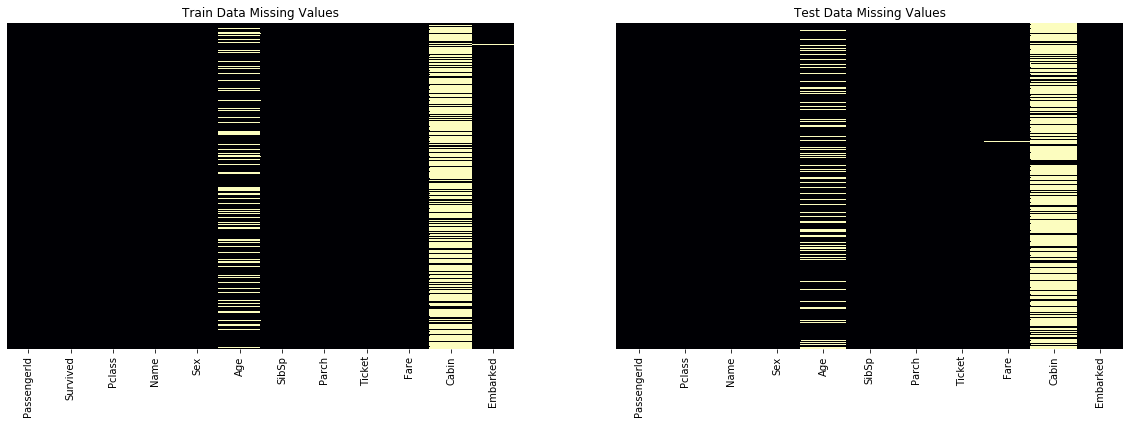

In [197]:
# Visualize missing Values
fig, ax = plt.subplots(ncols=2, figsize=(20, 6))
sns.heatmap(train.isnull(),
            yticklabels=False,
            cbar=False,
            cmap='magma',
            ax=ax[0])
sns.heatmap(test.isnull(),
            yticklabels=False,
            cbar=False,
            cmap='magma',
            ax=ax[1])

ax[0].set_title('Train Data Missing Values')
ax[1].set_title('Test Data Missing Values')

plt.xticks(rotation=90)
plt.show()

In [198]:
# 1.3 columns summary
print('train')
train.dtypes

train


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Summary for Columns
- Categorical: Pclass, Sex, Cabin, Embarked, Name, SibSp, Parch
- Numerical: Age, Fare
- Irrelevant: PassengerID, Ticket
- Target: Survived

In [199]:
# 1.4 Analyze Categorical Features 
# print out unique values for categorical features
features_cat = ['Survived','Pclass', 'Sex', 'Embarked', 'SibSp', 'Parch']
for fea in features_cat:
    print(fea, ':', train[fea].unique())
    print('======================================================')

Survived : [0 1]
Pclass : [3 1 2]
Sex : ['male' 'female']
Embarked : ['S' 'C' 'Q' nan]
SibSp : [1 0 3 4 2 5 8]
Parch : [0 1 2 5 3 4 6]


The Count in each categorical feature.


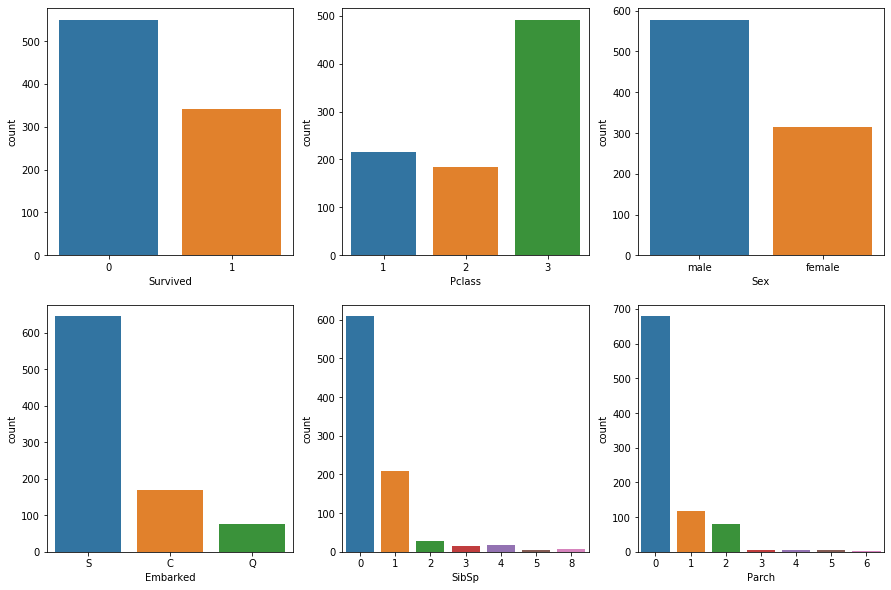

In [200]:
print('The Count in each categorical feature.')
fig, ax = plt.subplots(2,3, figsize = (15,10))
ax = ax.flatten()
for ind, feature in enumerate(features_cat):
    sns.countplot(x = feature, data = train, ax = ax[ind])

The percent of survival in each categorical feature.


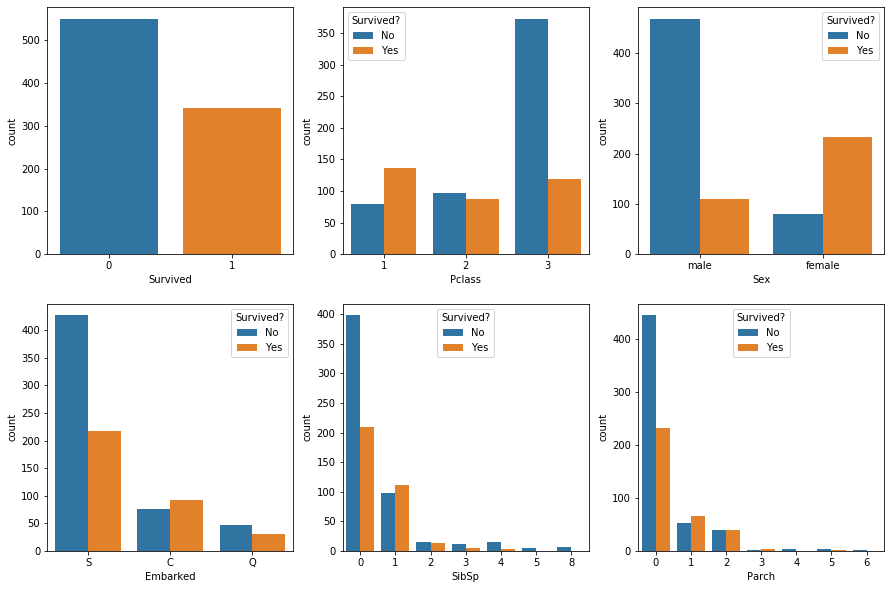

In [201]:
print('The percent of survival in each categorical feature.')
fig, ax = plt.subplots(2,3, figsize = (15,10))
ax = ax.flatten()
sns.countplot(x = 'Survived', data = train, ax = ax[0])
for ind, feature in enumerate(features_cat[1:]):
    sns.countplot(x = feature, hue = 'Survived', data = train, ax = ax[ind + 1])
    ax[ind + 1].legend(title = 'Survived?',
                      labels = ['No', 'Yes'])

- Some simple conclusions about categorical features
    - Survived: Most of the people did not survive
    - Pclass: Though there are more people in the third class, there is a high chance of survival in the first class
    - Sex: Though there are more male than female passengers, femele have a higher chance of survival 
    - For some wield reasons, passengers embarked at 'C' have a higher chance of survival 
    - SibSp & Parch: these are somewhat related features. If you have more families, probably you have a higher chance of survival?

In [202]:
# 1.5 Numerical Features
features_num = ['Age', 'Fare']
train[features_num].describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


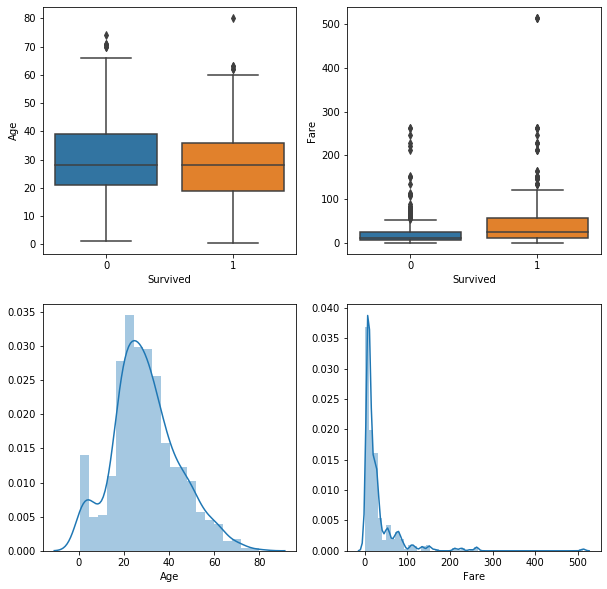

In [203]:
fig, ax = plt.subplots(2,2, figsize=(10,10))
sns.boxplot(x = 'Survived', y = 'Age', data = train, ax = ax[0,0])
sns.distplot(train.Age, ax = ax[1,0])
sns.boxplot(x = 'Survived', y = 'Fare', data = train, ax = ax[0,1])
sns.distplot(train.Fare, ax = ax[1,1])

In [204]:
# outliers 
# let's first find out the number of outliers in ['Age', 'Fare', 'Parch', 'SibSp']
for feature in features_num:
    print(f'The number of outliers in {feature}:', end = ' ')
    # 1st quartile (25%)
    Q1 = np.percentile(train[feature], 25)
    # 3rd quartile (75%)
    Q3 = np.percentile(train[feature],75)
    # Interquartile range (IQR)
    IQR = Q3 - Q1
    outliers = train.loc[(train[feature] > Q3 + 1.5 * IQR) 
                  | (train[feature] < Q1 - 1.5 * IQR),
                  feature]
    print(outliers.shape[0])

The number of outliers in Age: 0
The number of outliers in Fare: 116


## Numerical Features
- there are quite a lot outliers in Parch and Fare, which we should consider removing 
- SibSp and Parch are some what related features 
- So we would remove an observation if there are more than 2 outlier features

In [205]:
# Now we remove outliers 
outlier_ind = []
for feature in features_num:
    Q1, Q3 = np.percentile(train[feature], [25,75])
    IQR = Q3 - Q1
    outliers = train.loc[(train[feature] > Q3 + 1.5 * IQR) 
                  | (train[feature] < Q1 - 1.5 * IQR),
                  feature].index
    outlier_ind.extend(outliers)

In [206]:
outliers_count = {}
for ind in outlier_ind:
    if ind in outliers_count.keys():
        outliers_count[ind] += 1
    else:
        outliers_count[ind] = 1
outliers_selected = list( k for k, v in outliers_count.items() if v > 2 )

In [207]:
# let's see observations with outliers 
train.loc[outliers_selected,:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [208]:
# Remove Observations with outliers 
train.drop(index = outliers_selected, inplace = True, axis = 0)

## Feature Engineering

In [209]:
# Merge Train and Test Set 
titanic = pd.concat([train,test], axis = 0).reset_index(drop = True)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


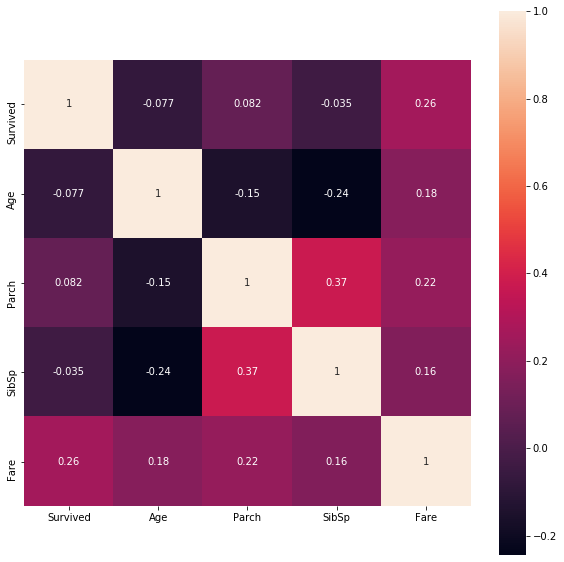

In [210]:
# 2.1 Numerical Features 
features_num = ['Age', 'Parch', 'SibSp', 'Fare']
fig, ax = plt.subplots(1, figsize = (10,10))
sns.heatmap(titanic[['Survived'] + features_num].corr(), 
            square = True, annot = True, ax = ax)

In [211]:
# 2.1 Family Size
# we create two new features: FamilySize, Along
titanic['FamilySize'] = titanic[['SibSp', 'Parch']].sum(axis = 1) + 1
titanic['Alone'] = titanic.FamilySize.apply(lambda x : 1 if x == 1 else 0)

In [212]:
# 2.2 Title 
title_dictionary = {
    'Capt': 'Dr/Clergy/Mil',
    'Col': 'Dr/Clergy/Mil',
    'Major': 'Dr/Clergy/Mil',
    'Jonkheer': 'Honorific',
    'Don': 'Honorific',
    'Dona': 'Honorific',
    'Sir': 'Honorific',
    'Dr': 'Dr/Clergy/Mil',
    'Rev': 'Dr/Clergy/Mil',
    'the Countess': 'Honorific',
    'Mme': 'Mrs',
    'Mlle': 'Miss',
    'Ms': 'Mrs',
    'Mr': 'Mr',
    'Mrs': 'Mrs',
    'Miss': 'Miss',
    'Master': 'Master',
    'Lady': 'Honorific'}
# extract titles
titanic['Title'] = titanic.Name.apply(
    lambda x : x.split(',')[1].split('.')[0].strip())
# Map titles for more readable table
titanic.Title = titanic.Title.map(title_dictionary)
# Encode Title Information
title_dummies = pd.get_dummies(titanic.Title, prefix = 'Title_')
titanic = pd.concat([titanic, title_dummies], axis = 1)

In [213]:
# 2.3 Age
# Remember that there are a lot of missing values in Age feature
titanic.Age.fillna(value = titanic.Age.median(), inplace = True)
age_group = [0, 2, 18, 40, 60, np.inf]
age_label = ['less2', '2-18', '18-40', '40-60', 'old']
# Group ages according to the bins and labels above
titanic['Age_group'] = pd.cut(titanic.Age, bins = age_group, labels = age_label)
# Encode Age Bins
age_dummies = pd.get_dummies(titanic.Age_group, prefix = 'Age_')
titanic = pd.concat([titanic, age_dummies], axis = 1)

In [214]:
# 2.4 Fare
# we first fill na values in Fare
titanic.Fare.fillna(value = titanic.Fare.median(), inplace = True)

In [215]:
# 2.5 Embarked
# Fill na values in Embarked with the most frequent value
titanic.Embarked.fillna(value = 'S', inplace = True)
Embarked_dummy = pd.get_dummies(titanic.Embarked, prefix = 'Embarked_')
titanic = pd.concat([titanic, Embarked_dummy], axis = 1)

In [216]:
# 2.6 Sex
titanic['Sex_male'] = titanic.Sex.map({'male' : 1, 'female' : 0})

In [217]:
# 2.7 Pclass
# Get dummies for Pclass
Pclass_dummy = pd.get_dummies(titanic.Pclass, prefix = 'Pclass_')
titanic = pd.concat([titanic, Pclass_dummy], axis = 1)

In [218]:
# 2.8 create a copy for modeling dataset
modelDF = titanic.drop(columns = ['PassengerId', 'Pclass', 'Name',
                                  'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
                                 'Fare', 'Cabin', 'Embarked', 'Title', 'Age_group'], 
                       axis = 1)

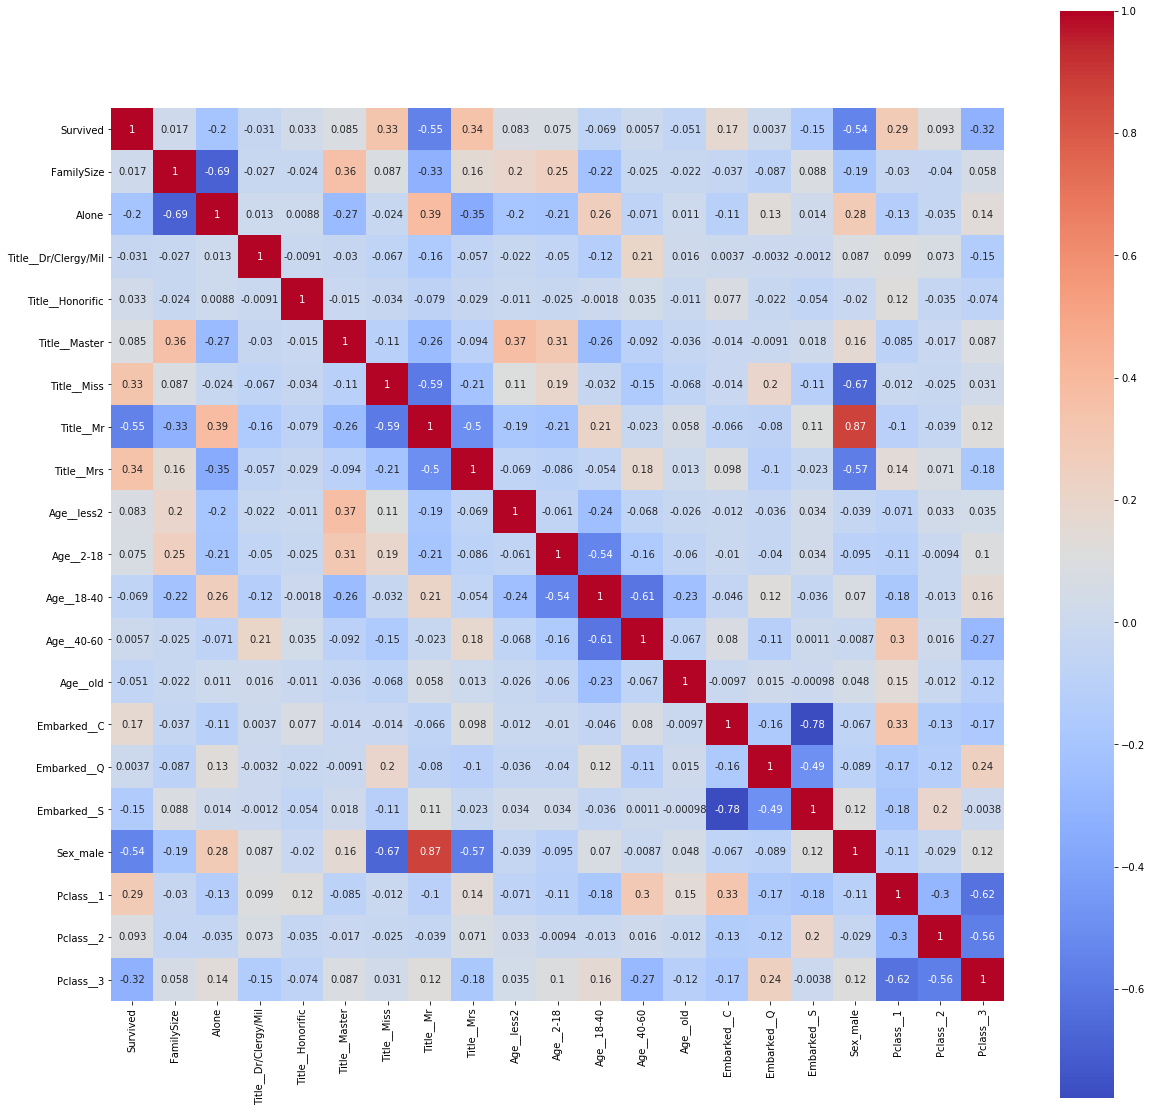

In [219]:
fig, ax = plt.subplots(1, figsize = (20,20))
sns.heatmap(modelDF.corr(),annot = True, square = True,cmap='coolwarm', ax = ax)

In [220]:
# now we split back into training and testing sets
train_raw = pd.read_csv('train.csv')
test_raw = pd.read_csv('test.csv')
idx = train_raw.shape[0]
train = modelDF.iloc[:idx,:]
test = modelDF.iloc[idx:,:]

# Modeling

In [221]:
# import modeling packages 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
from sklearn.model_selection import RandomizedSearchCV

In [222]:
# split training and validating datasets
X_train, X_valid, y_train, y_valid = train_test_split(
    train.drop(columns = 'Survived', axis = 1), train.Survived, 
    test_size = 0.4, random_state = 4)
X_test = test.drop(columns = 'Survived', axis = 1)

## KNN

In [223]:
# We first model using KNN Classifier and hyperparameter using randomized search CV
knn = KNeighborsClassifier()
# specify "parameter distributions" 
k_range = list(range(1,31))
weights_range = ['uniform', 'distance']
param_dist = dict(n_neighbors=k_range, weights = weights_range)
# n_iter controls the number of searches
rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring='accuracy', 
                          n_iter=10, random_state=5, return_train_score=False)
rand.fit(X_train, y_train)
display(pd.DataFrame(rand.cv_results_)[['mean_test_score', 'std_test_score', 'params']])

# examine the best model
print(rand.best_score_)
print(rand.best_params_)

,mean_test_score,std_test_score,params
0,0.797589,0.060192,"{'weights': 'distance', 'n_neighbors': 16}"
1,0.812753,0.043415,"{'weights': 'uniform', 'n_neighbors': 22}"
2,0.805276,0.055161,"{'weights': 'uniform', 'n_neighbors': 18}"
3,0.807128,0.045872,"{'weights': 'uniform', 'n_neighbors': 27}"
4,0.810901,0.048460,"{'weights': 'uniform', 'n_neighbors': 29}"
5,0.799441,0.062659,"{'weights': 'distance', 'n_neighbors': 10}"
6,0.803180,0.061615,"{'weights': 'distance', 'n_neighbors': 22}"
7,0.807198,0.051363,"{'weights': 'uniform', 'n_neighbors': 14}"
8,0.799476,0.063015,"{'weights': 'distance', 'n_neighbors': 12}"
9,0.807163,0.047417,"{'weights': 'uniform', 'n_neighbors': 15}"


0.8127533193570929
{'weights': 'uniform', 'n_neighbors': 22}


In [228]:
# We test on our validating set
knn22 = KNeighborsClassifier(n_neighbors = 22, weights = 'uniform')
knn22.fit(X_train, y_train)
y_valid_pred = knn.predict(X_valid)
print('Accuracy score for KNN (n_neighbors = 22): ',metrics.accuracy_score(y_valid, y_valid_pred))

Accuracy score for KNN (n_neighbors = 22):  0.8151260504201681


## Logistic Regression

In [225]:
lgCl = LogisticRegression()
lgCl.fit(X_train, y_train)
y_valid_pred = lgCl.predict(X_valid)
print('Accuracy score for Logistic Regression: ',metrics.accuracy_score(y_valid, y_valid_pred))

Accuracy score for Logistic Regression:  0.8487394957983193


## Plot ROC Curves

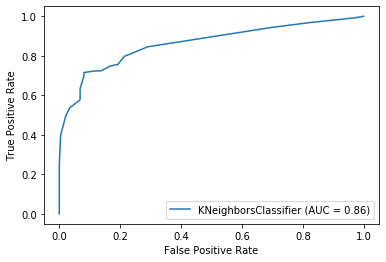

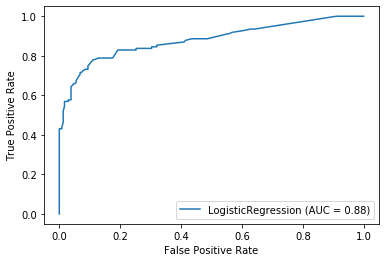

In [226]:
knn22 = KNeighborsClassifier(n_neighbors = 22, weights = 'uniform')
knn22.fit(X_train, y_train)
lgCl = LogisticRegression()
lgCl.fit(X_train, y_train)
metrics.plot_roc_curve(knn22, X_valid, y_valid)
metrics.plot_roc_curve(lgCl, X_valid, y_valid)

# Submit Answers

In [229]:
lgCl = LogisticRegression()
lgCl.fit(X_train, y_train)
y_test_pred = lgCl.predict(X_test)

In [230]:
test_df = pd.read_csv('test.csv')
submission = pd.DataFrame(columns = ['PassengerId', 'Survived'])
submission.PassengerId = test_df.PassengerId
submission.Survived = y_test_pred
submission.Survived = submission.Survived.astype('int')
submission.to_csv('submission_lgCl.csv', header = True, index = False)
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [231]:
knn22 = KNeighborsClassifier(n_neighbors = 22, weights = 'uniform')
knn22.fit(X_train, y_train)
y_test_pred = knn22.predict(X_test)

In [232]:
test_df = pd.read_csv('test.csv')
submission = pd.DataFrame(columns = ['PassengerId', 'Survived'])
submission.PassengerId = test_df.PassengerId
submission.Survived = y_test_pred
submission.Survived = submission.Survived.astype('int')
submission.to_csv('submission_knn.csv', header = True, index = False)
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
